In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pywt

1. С помощью библиотеки OpenCV считайте изображение:

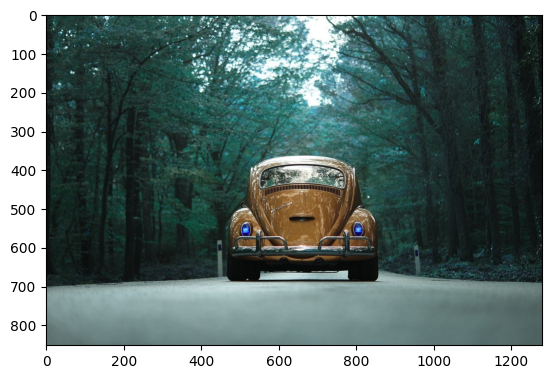

In [5]:
IMG_PATH = "data\\Task_6\\1.jpg"
image = cv2.imread(IMG_PATH)
plt.imshow(image)

2. Выделите подматрицу пикселей, находящихся на пересечении строк в диапазоне от `321` до `534`, и столбцов в диапазоне от `561` до `739`, матричного представления изображения (т.е. `[321:534, 561:739]`).

Ширина: 178
Высота: 213


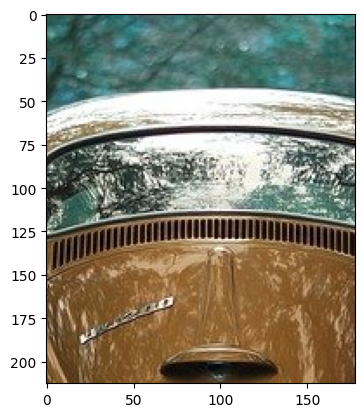

In [7]:
cropped_image = image[321:534, 561:739]
plt.imshow(cropped_image)
print("Ширина:", cropped_image.shape[1])
print("Высота:", cropped_image.shape[0])

4. Используйте дескриптор SIFT для нахождения одного изображения в другом (кадрированного на исходном). Не забудьте перевести их в градации серого.

In [14]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray_image, None)
kp2, des2 = sift.detectAndCompute(gray_cropped_image, None)

5. Отсортируйте совпадения от лучшего к худшему в зависимости от аттрибута distance (чем меньше, тем лучше). Определите координаты нулевой ключевой точки на исходном изображении.

Введите координату по горизонтали, округлив до целого:

Введите координату по вертикали, округлив до целого:

In [28]:
bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)
x, y = map(int, kp1[matches[0].queryIdx].pt)
print("x: ", x)
print("y: ", y)

x:  572
y:  450


6. Определите интенсивность каналов B,G,R для полученной ключевой точки:

Введите значения интенсивности канала B:
Введите значения интенсивности канала G:

Введите значения интенсивности канала R:

In [30]:
b, g, r = image[y,x,:]
print("b:", b)
print("g:", g)
print("r:", r)

b: 122
g: 101
r: 80
